Perform hierarchical clustering on the Play data and and the data generated with the help of two equations of concentric circles, adding some random noise. Apply various distance measures, including single, multiple, and average linkages, and ward.

Perform k-Means clustering on the Play data and also Boston housing data and arrive at an optimal number of clusters via the elbow method.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns 

In [2]:
import os

os.getcwd()

'/Users/shubhamgoyal/Downloads/DataSciece19098'

In [3]:
os.chdir('/Users/shubhamgoyal/Downloads/DataSciece19098/')
os.getcwd()

'/Users/shubhamgoyal/Downloads/DataSciece19098'

In [4]:
ls

Assignment1_ShubhamGoyal_Sec11.ipynb   ShubhamGoyal_Assignment3_Sec11.ipynb
Assignment2_ShubhamGoyal_Sec11.ipynb   ShubhamGoyal_Assignment5.pdf
Assignment2_ShubhamGoyal_Sec11.xls     ShubhamGoyal_Assignment5.zip
Assignment4_ShubhamGoyal_Sec11.ipynb   ShubhamGoyal_Assignment6.pdf
Assignment4_ShubhamGoyal_Sec11.pdf     ShubhamGoyal_Assignment6.zip
Assignment5_ShubhamGoyal.ipynb         Statistics and Probability - v5.pdf
Assignment6_ShubhamGoyal.ipynb         boston housing.xls
Chemical Process.xlsx                  circles.R
DSAEM-19098/                           dt_entropy.png
ExamData.xlsx                          dt_gini.png
Exercise 10.05.ipynb                   loan.xlsx
Exercise 10.12.ipynb                   one.png
Machine Learning v4.pdf                output/
Number of Support Vectors 2.R          pima-indians-diabetes 2.csv
Number of Support Vectors.R            pima-indians-diabetes.csv
Python Coding Exercises.pdf            play.xlsx
ShubhamGoyal_Assignment3_Sec11(1).pdf  pr

In [5]:
play_df= pd.read_excel('play.xlsx')
play_df.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [6]:
play_df.Outlook.value_counts(), play_df.Windy.value_counts(),play_df.Decision.value_counts()

(rain        5
 sunny       5
 overcast    4
 Name: Outlook, dtype: int64,
 weak      8
 strong    6
 Name: Windy, dtype: int64,
 play         9
 dont_play    5
 Name: Decision, dtype: int64)

In [7]:
play_df.dtypes

Outlook        object
Temperature     int64
Humidity        int64
Windy          object
Decision       object
dtype: object

In [8]:
#restricting data to just Temperature and Humidity (as suggested by Prof)

play_df_upd=play_df[['Temperature','Humidity']]
play_df_upd.head()

,Temperature,Humidity
0,72,90
1,83,78
2,64,65
3,81,75
4,75,70


In [9]:
# from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()

# play_df['Windy_cat'] = labelencoder.fit_transform(play_df['Windy'])

# play_df.drop('Windy',inplace=True,axis=1)

# play_df.head()


In [10]:
# from sklearn.preprocessing import OneHotEncoder

# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# col_enc = ['Outlook', 'Decision']

# # Use the one-hot encoder to transform the categorical data columns. 
# play_df_enc = pd.DataFrame(OH_encoder.fit_transform(play_df[col_enc]))

# #reassigning the original index.
# play_df_enc.index = play_df.index

# # Addings columns as per the encoding 
# play_df_enc.columns = OH_encoder.get_feature_names(col_enc)

# # Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
# play_df_no_enc = play_df.drop(col_enc, axis=1)

# # Concatenate the one-hot encoded columns with the existing numerical features/columns.
# play_df_upd = pd.concat([play_df_no_enc, play_df_enc], axis=1)
# play_df_upd.head()

In [11]:
from sklearn.preprocessing import normalize
scale_cols=['Temperature','Humidity']

play_df_upd[scale_cols]=normalize(play_df_upd[scale_cols])
play_df_upd.head()


<ipython-input-11-f92382a1052e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_df_upd[scale_cols]=normalize(play_df_upd[scale_cols])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Temperature,Humidity
0,0.624695,0.780869
1,0.728715,0.684817
2,0.701604,0.712567
3,0.733761,0.679408
4,0.731055,0.682318


In [12]:
play_df_upd

,Temperature,Humidity
0,0.624695,0.780869
1,0.728715,0.684817
2,0.701604,0.712567
3,0.733761,0.679408
4,0.731055,0.682318
5,0.664364,0.747409
6,0.707107,0.707107
7,0.604019,0.796970
8,0.702002,0.712175
9,0.663783,0.747925


In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

1) WARD Method

NameError: name 'shc' is not defined

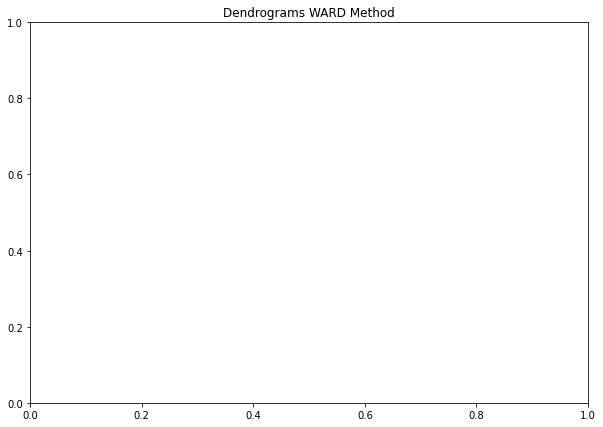

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms WARD Method")  
dend = sch.dendrogram(sc.linkage(play_df_upd, method='ward'))
plt.axhline(y=0.2, color='r', linestyle='--')

In [15]:
#We get two clusters with the ward distance method, clustering 0,7 and 13th observation into one cluster and the 
#remaining in another

In [248]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(play_df_upd)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

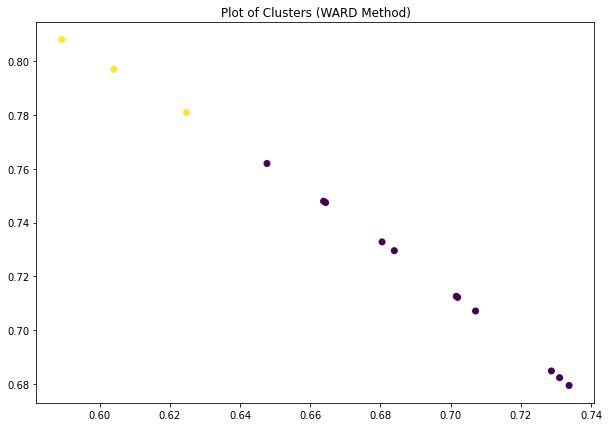

In [270]:
plt.figure(figsize=(10, 7))  
plt.title("Plot of Clusters (WARD Method)")  
plt.scatter(play_df_upd['Temperature'], play_df_upd['Humidity'], c=cluster.labels_) 

2) Single Method for linkage distance

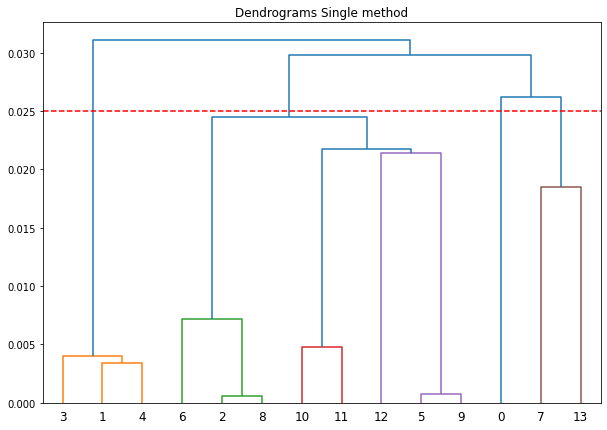

In [271]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Single method")  
dend = sch.dendrogram(shc.linkage(play_df_upd, method='single'))
plt.axhline(y=0.025, color='r', linestyle='--')

In [252]:
# With the single distance method, we're getting four clusters

In [253]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='single')  
cluster.fit_predict(play_df_upd)

array([3, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2])

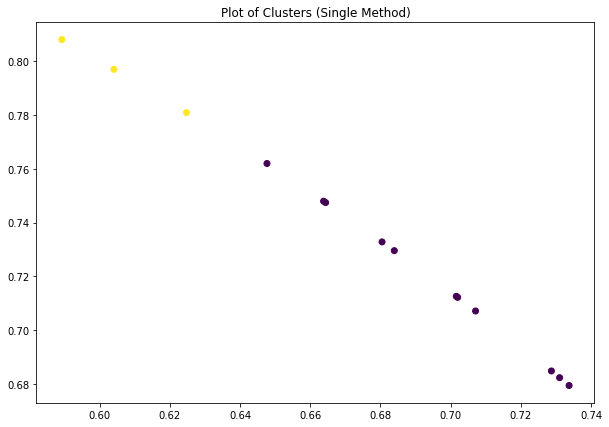

In [272]:
plt.figure(figsize=(10, 7))  
plt.title("Plot of Clusters (Single Method)")  
plt.scatter(play_df_upd['Temperature'], play_df_upd['Humidity'], c=cluster.labels_) 

3) Complete Method

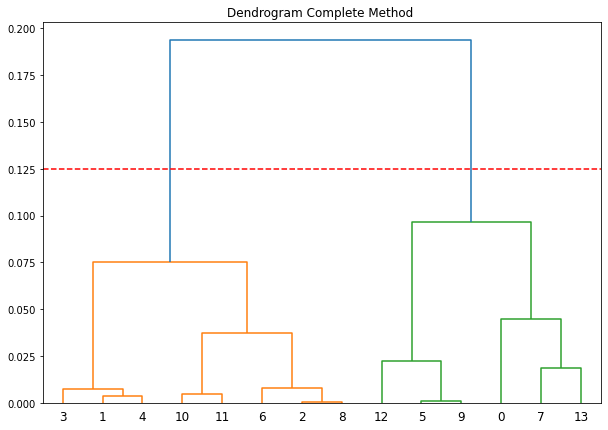

In [274]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram Complete Method ")  
dend = sch.dendrogram(shc.linkage(play_df_upd, method='complete'))
plt.axhline(y=0.125, color='r', linestyle='--')

In [ ]:
# with complete distance method we're getting 2 clusters, nearly of equal size

In [257]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete')  
cluster.fit_predict(play_df_upd)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

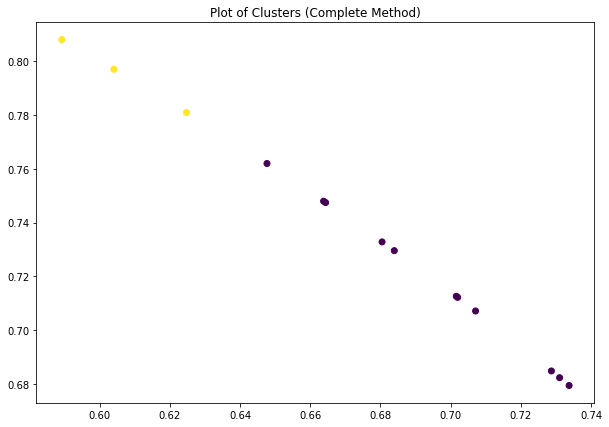

In [275]:
plt.figure(figsize=(10, 7))  
plt.title("Plot of Clusters (Complete Method)")  
plt.scatter(play_df_upd['Temperature'], play_df_upd['Humidity'], c=cluster.labels_) 

4) Average method

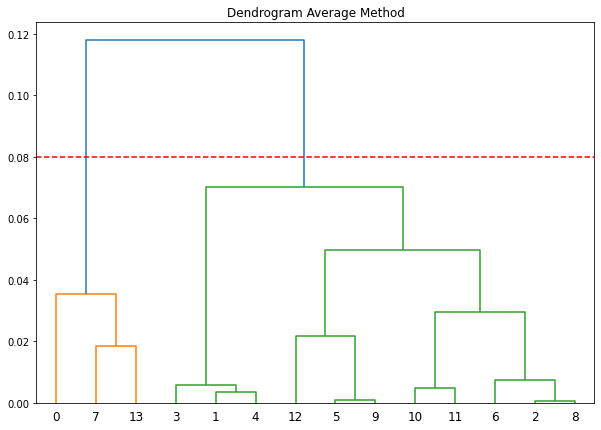

In [276]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram Average Method")  
dend = sch.dendrogram(shc.linkage(play_df_upd, method='average'))
plt.axhline(y=0.08, color='r', linestyle='--')

In [ ]:
#with average distance method as well we get 2 clusters

In [263]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='average')  
cluster.fit_predict(play_df_upd)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

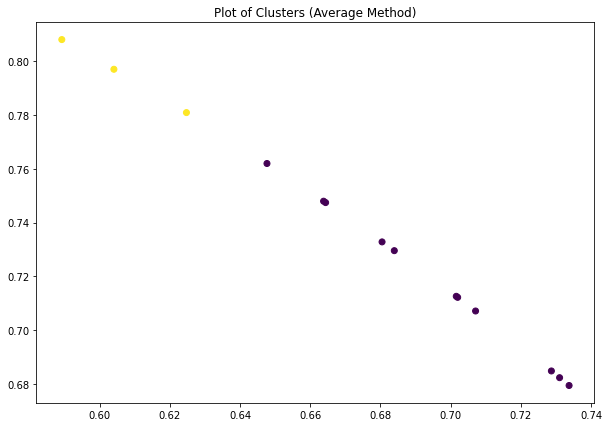

In [277]:
plt.figure(figsize=(10, 7))  
plt.title("Plot of Clusters (Average Method)")  
plt.scatter(play_df_upd['Temperature'], play_df_upd['Humidity'], c=cluster.labels_) 

# Concentric circle data problem

In [106]:
def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t)
        y = r * np.sin(t) + np.random.normal(loc=0,scale=0.2,size=len(x))
        circles.append(np.c_[x, y])
    return circles

In [107]:
r = [5,10]
n = [72, 72]
circles = circle_points(r, n)

<Figure size 720x504 with 0 Axes>

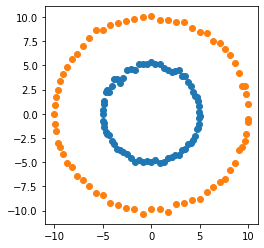

<Figure size 720x504 with 0 Axes>

In [146]:
fig, ax = plt.subplots()
for circle in circles:
    ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')
plt.figure(figsize=(10, 7))  

In [112]:
cir1=pd.DataFrame(circles[0])
cir1[2]=1
cir1.columns=['xv','yv','class']

cir2=pd.DataFrame(circles[1])
cir2[2]=2
cir2.columns=['xv','yv','class']

cir1.head(),cir2.head()

(         xv        yv  class
 0  5.000000 -0.218160      1
 1  4.980973  0.152411      1
 2  4.924039  0.835762      1
 3  4.829629  1.270595      1
 4  4.698463  1.772380      1,
           xv        yv  class
 0  10.000000 -0.533063      2
 1   9.961947  0.958803      2
 2   9.848078  1.991793      2
 3   9.659258  2.822711      2
 4   9.396926  2.844789      2)

In [122]:
cir_all=pd.concat([cir1,cir2])
print(cir_all.shape)
cir_all.head()

(144, 3)


,xv,yv,class
0,5.000000,-0.218160,1
1,4.980973,0.152411,1
2,4.924039,0.835762,1
3,4.829629,1.270595,1
4,4.698463,1.772380,1


1) Ward Method

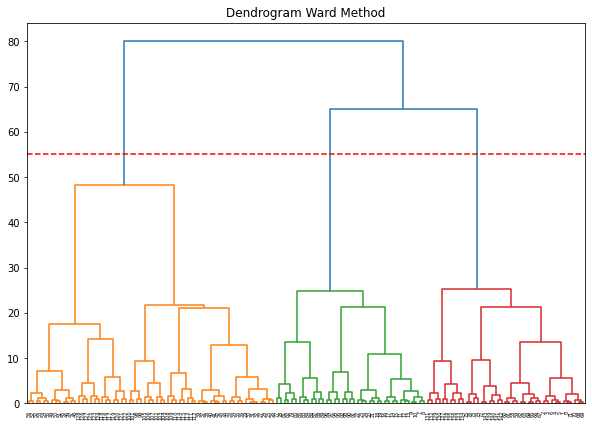

In [278]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram Ward Method")  
dend = sch.dendrogram(shc.linkage(cir_all, method='ward'))
plt.axhline(y=55, color='r', linestyle='--')

In [280]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(cir_all)

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

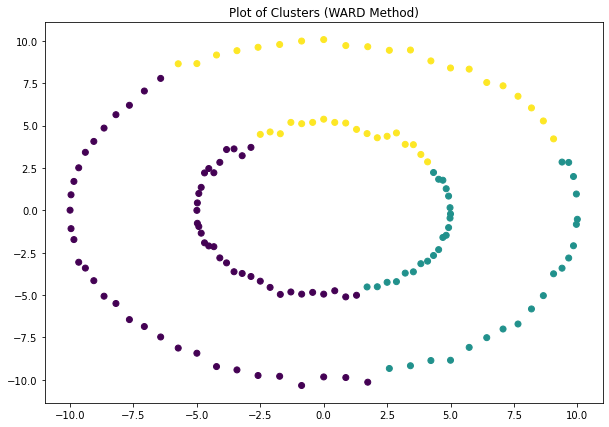

In [281]:
plt.figure(figsize=(10, 7))  
plt.title("Plot of Clusters (WARD Method)")  
plt.scatter(cir_all['xv'], cir_all['yv'], c=cluster.labels_) 

Inference :

- We're getting 3 clusters as seen above with the 'Ward' distance method
- The algorithm is trying to trisect the data based on the closeness of inner and outer cirlces

2) Single Method

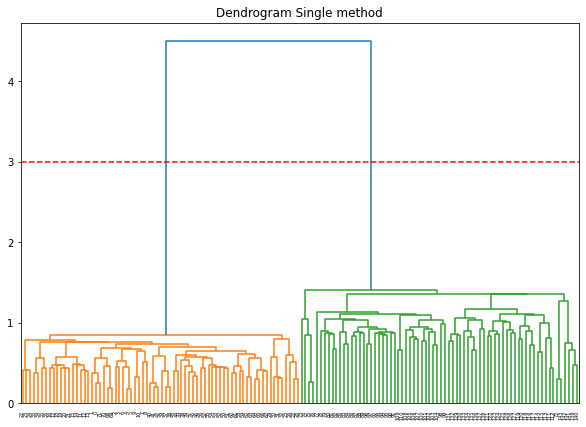

In [282]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram Single method")  
dend = sch.dendrogram(shc.linkage(cir_all, method='single'))
plt.axhline(y=3, color='r', linestyle='--')

In [283]:
cluster = AgglomerativeClustering(n_clusters=2,linkage='single')  
cluster.fit_predict(cir_all)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

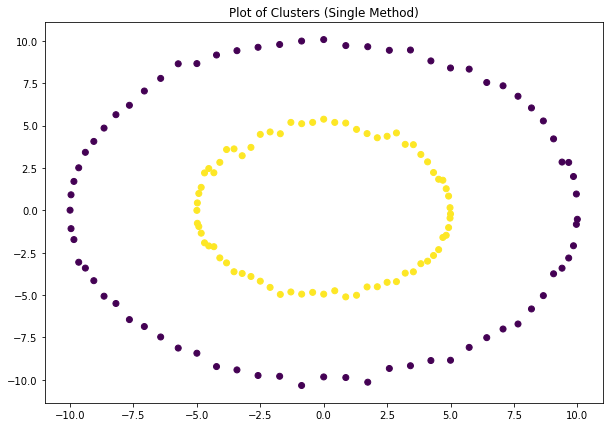

In [284]:
plt.figure(figsize=(10, 7)) 
plt.title("Plot of Clusters (Single Method)")  
plt.scatter(cir_all['xv'], cir_all['yv'], c=cluster.labels_) 

Inference :

- We're getting 2 clusters as seen above with the 'Single' distance method
- The algorithm divided inner and outer circle data completely 

3) Complete Method

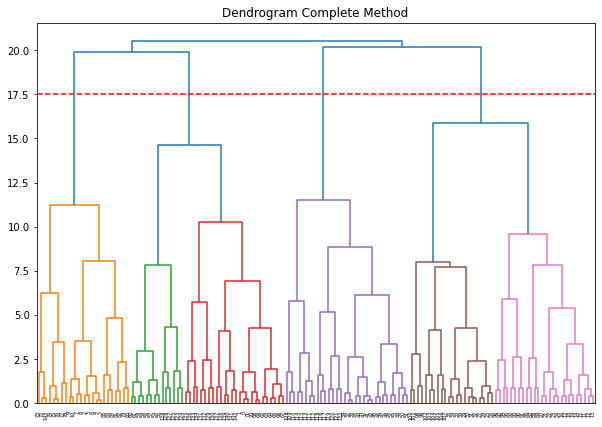

In [286]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram Complete Method")  
dend = sch.dendrogram(shc.linkage(cir_all, method='complete'))
plt.axhline(y=17.5, color='r', linestyle='--')

In [287]:
cluster = AgglomerativeClustering(n_clusters=4,linkage='complete')  
cluster.fit_predict(cir_all)

array([1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

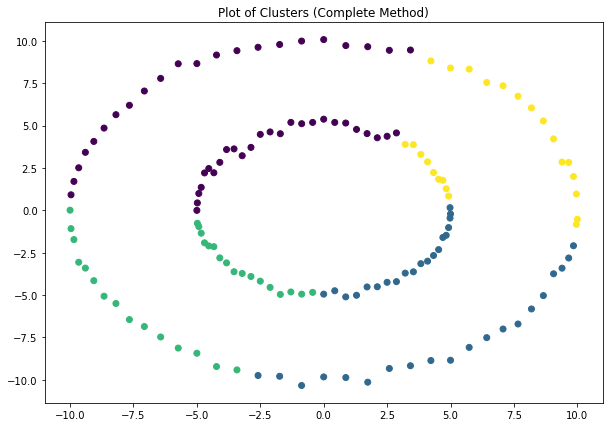

In [288]:
plt.figure(figsize=(10, 7))  
plt.title("Plot of Clusters (Complete Method)")  
plt.scatter(cir_all['xv'], cir_all['yv'], c=cluster.labels_) 

Inference :

- We're getting 4 clusters as seen above with the 'complete' distance method
- Similar to 'ward' method the algorithm is trying to divide the data based on the closeness of inner and outer cirlces

4) Average method

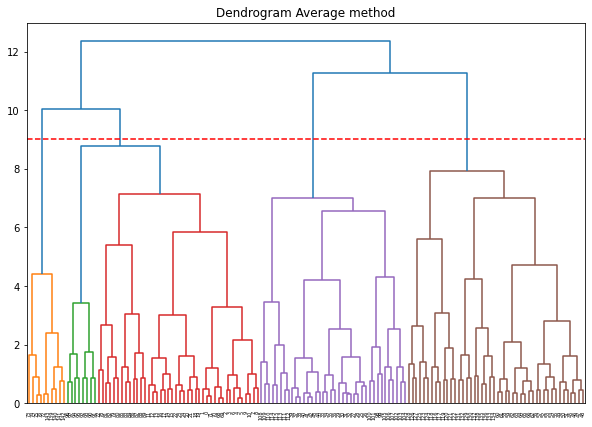

In [289]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram Average method")  
dend = sch.dendrogram(shc.linkage(cir_all, method='average'))
plt.axhline(y=9, color='r', linestyle='--')

In [290]:
cluster = AgglomerativeClustering(n_clusters=4,linkage='average')  
cluster.fit_predict(cir_all)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

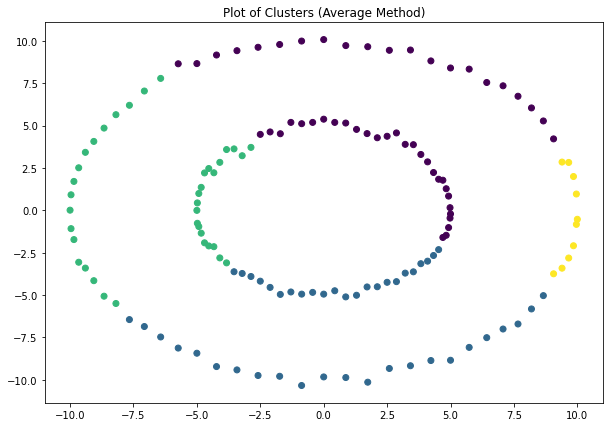

In [291]:
plt.figure(figsize=(10, 7)) 
plt.title("Plot of Clusters (Average Method)")  
plt.scatter(cir_all['xv'], cir_all['yv'], c=cluster.labels_) 

Inference :

- We're getting 4 clusters as seen above with the 'average' distance method
- The algorithm is created one extra cluster in yellow above, which seems slightly off the results with the other methods


# Kmeans Clustering on Play and Boston housing data -

For n_clusters=2, the silhouette score is 0.55293381289308
For n_clusters=3, the silhouette score is 0.5842449598156302
For n_clusters=4, the silhouette score is 0.6041262068078584
For n_clusters=5, the silhouette score is 0.6141672089170428
For n_clusters=6, the silhouette score is 0.6432036029506965


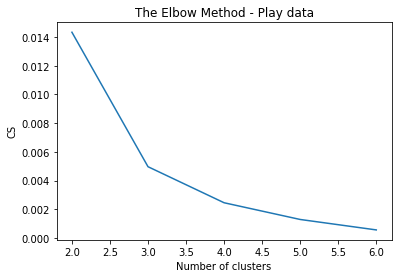

In [292]:
#taking pre-process play data from initial part of this notebook - 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

cs = []
labels={}
for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(play_df_upd)
    cs.append(kmeans.inertia_)
    cluster_labels=kmeans.labels_
    silhouette_avg = silhouette_score(play_df_upd, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
    labels[i]=cluster_labels

plt.plot(range(2, 7), cs)
plt.title('The Elbow Method - Play data')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [268]:
labels

{2: array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int32),
 3: array([0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0], dtype=int32),
 4: array([3, 0, 2, 0, 0, 1, 2, 3, 2, 1, 2, 2, 1, 3], dtype=int32),
 5: array([0, 3, 1, 3, 3, 4, 1, 2, 1, 4, 4, 4, 0, 2], dtype=int32),
 6: array([1, 0, 4, 0, 0, 5, 4, 3, 4, 5, 2, 2, 5, 3], dtype=int32)}

Inference :

- With the elbow method, we're getting 4 clusters as the optimal number for this data
- if we compare it with heirarichal clustering, we're getting 2 extra clusters with k-means
- from the labels above, we see the clusters for observations are - (0,7,13),(1,3,4),(2,6,8,10,11),(5,9,12) which mostly matches with clusters received from heirarichal clustering

2) Clustering on boston housing data

In [181]:
bh_df= pd.read_excel('boston housing.xls')
print(bh_df.shape)
bh_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [179]:
bh_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


For n_clusters=2, the silhouette score is 0.689176627308424
For n_clusters=3, the silhouette score is 0.7206268848853595
For n_clusters=4, the silhouette score is 0.5627675535601396
For n_clusters=5, the silhouette score is 0.5651330267237967
For n_clusters=6, the silhouette score is 0.49418258446109425


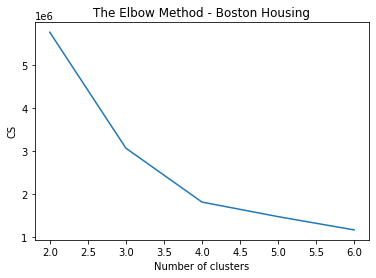

In [293]:
cs = []
labels={}
for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(bh_df)
    cs.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(bh_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
    labels[i]=cluster_labels

plt.plot(range(2, 7), cs)
plt.title('The Elbow Method - Boston Housing')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [220]:
bh_df['Cluster_Id'] = labels[4]
bh_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV,Cluster_Id
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001,0


In [237]:
# plt.figure(figsize = (10,7))
# plt.subplot(3,1,1)
# sns.scatterplot(x = 'LSTAT', y = 'TAX',hue='Cluster_Id',data = bh_df,legend='full',palette="Set1")

Inference :

- With the elbow method, we're getting 4 clusters as the optimal number for this data